In [23]:
from IPython.display import HTML

HTML('''<script>
code_show=true; 
function code_toggle() {
 if (code_show){
 $('div.input').hide();
 } else {
 $('div.input').show();
 }
 code_show = !code_show
} 
$( document ).ready(code_toggle);
</script>
<form action="javascript:code_toggle()"><input type="submit" value="Toggle Code"></form>''')

# Spherical harmonic power spectra of Ur at a constant radius in the F4 run

In [1]:
import utils
from ppm import *
import numpy as np
import matplotlib.pyplot as plt
%matplotlib nbagg

prof = yprofile('/rpod2/PPM/YProfiles/AGBTP_M2.0Z1.e-5/F4')
spec_dir = '/rpod2/PPM/spectra/data/'

cb = utils.colourblind

/usr/local/anaconda2/lib/python2.7/site-packages/matplotlib/__init__.py:872: UserWarning: axes.color_cycle is deprecated and replaced with axes.prop_cycle; please use the latter.
  warnings.warn(self.msg_depr % (key, alt_key))


Reading attributes from file  YProfile-01-1959.bobaaa
Analyzing headers ...
There are 1960 YProfile files in the /rpod2/PPM/YProfiles/AGBTP_M2.0Z1.e-5/F4 directory.
Ndump values range from 0 to 1959
Time values range from 86.5493 to 162264.0


In [2]:
dumps = [160, 340, 520, 700, 900]
markers = ['v', '^', '<', '>', 'o', 's']
colours = [9, 3, 5, 8, 1, 6]

<IPython.core.display.Javascript object>


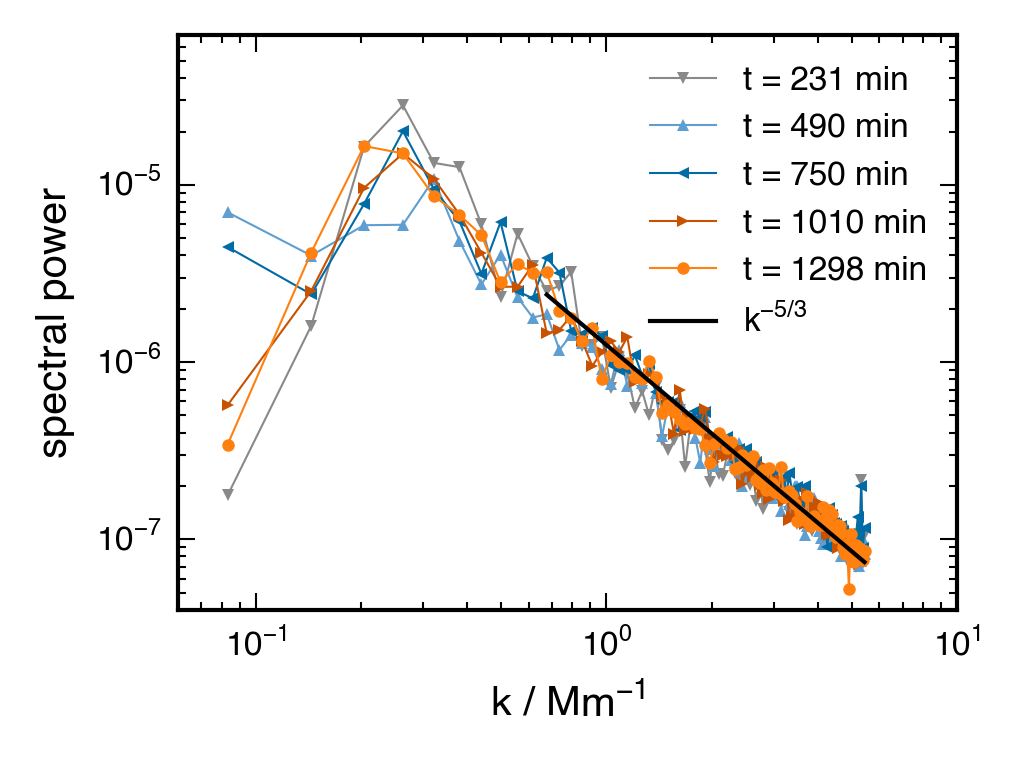

In [24]:
ifig = 1; plt.close(ifig); plt.figure(ifig)
for i in range(len(dumps)):
    t = prof.get('t', fname = dumps[i] - 1, resolution = 'l', silent = False)[-1]
    
    rad = 17.
    fname = spec_dir + 'LZagb-{:04d}-Ur-{:02.0f}.ylmspc'.format(dumps[i], rad)
    data = np.loadtxt(fname)
    
    L = data[:, 0]
    k = np.sqrt(L*(L + 1.))/rad
    power = data[:, 1]
    
    plt.loglog(k, power, '-', lw=0.5, color=cb(colours[i]), marker=markers[i], \
               markevery=1, markersize=3., label='t = {:.0f} min'.format(t/60.))
    
plt.loglog(k[10:], 1.25e-6*k[10:]**(-5./3.), 'k-', lw=1., label=r'k$^{-5/3}$')
    
plt.legend(loc=1, ncol=1)
plt.xlim((6e-2, 1e1))
plt.ylim((4e-8, 7e-5))
plt.xlabel(r'k / Mm$^{-1}$')
plt.ylabel('spectral power')
plt.tight_layout()
plt.savefig('Ur_power_spectra_F4.pdf')